In [4]:
%matplotlib inline
import numpy as np
import nengo
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

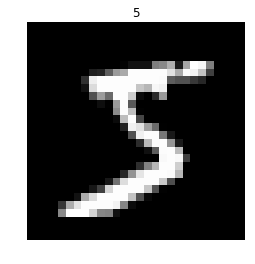

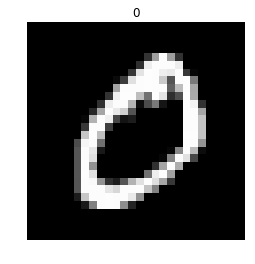

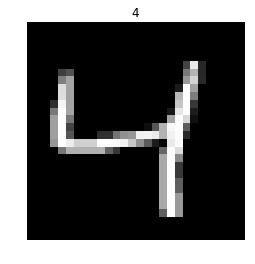

In [5]:
# load MINIST dataset
(train_images, train_labels), (test_images, test_labels) = (tf.keras.datasets.mnist.load_data())

# flatten images
train_images = train_images.reshape((train_images.shape[0], -1))
test_images = test_images.reshape((test_images.shape[0], -1))

for i in range(3):
    plt.figure()
    plt.imshow(np.reshape(train_images[i], (28, 28)),
               cmap="gray")
    plt.axis('off')
    plt.title(str(train_labels[i]));

In [ ]:
# gaussian receptive field to encode input 
#  encoding time interval = spike_time_ms in https://www.sciencedirect.com/science/article/pii/S0925231214005785 2.2
# Number of gaussian receptors "number_neurons"
# Parameter from gaussian curve sigma
# Min and max value from data to encode  "min_value" and "max_value"
def receptive_field(number_neurons, sigma, min_value, max_value, value_to_encode, spike_time_ms):
    number_n_fields = number_neurons
    bins = value_to_encode
    Gauss_centers = np.arange(min_value, max_value,
                              np.divide(np.abs(np.array(max_value) - (min_value)), number_n_fields)).tolist()
    r = []
    for i in Gauss_centers:
        r.append(1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(- (bins - i) ** 2 / (2 * sigma ** 2)))
    spike_time = pd.DataFrame([-spike_time_ms * r[i] + 10 for i in range(8)])
    spike_time[spike_time >= 9] = 'Silent'
    return r, spike_time  # Return values and a dataframe with the data

In [ ]:
# define learning function (deltaOmega)
def deltaOmega(t_pre,t_post,alpha = 0.85,Lambda = 0.03):
    tau_plus = 0.0168 # 16.8 ms
    tau_minus = 0.0337 # 33.7 ms
    
    if t_pre-t_post>0:
        deltaomega = -alpha*Lambda*np.exp((t_post-t_pre)/tau_minus)
    elif t_pre-t_post<0:
        deltaomega = Lambda*np.exp((t_pre-t_post)/tau_plus)
        
    return deltaomega
    

In [ ]:
# define plasticity rule (when to update deltaOmega)

In [ ]:
# define the network: input, m(m=10, number of classes) neuron ensembles(n=20 etc)

with nengo.Network(seed=0) as net:
    # default parameter of the neuron: type LIF; other parameters in the paper; tbd (or define later in the ensembles)
    # neuron_type = nengo.LIF(amplitude=0.001) # Vth = 1 mV

    # the input node that will be used to feed in input images
    inp = nengo.Node(np.zeros(28 * 28))

    neuron_ensembles = []
    for i in range(10):
        neuron_ensembles.append(nengo.Ensemble(n_neuron=20,dimensions=1),
                                neuron_type=nengo.LIF(tau_rc=0.02, tau_ref=0.002))
        
    input_connections = []
    for i in range(10):
        input_connections.append(nengo.Connection(inp,neuron_ensembles[i]))
    
    # implement the learning rule
    # gaussian receptive field decides t_pre
    # dV/dt decides t_post
    
    # implement the plasticity rule
    # update w after t_post happens? tbd

    # readout: detect the first firing neuron ensembles and return its class
    # maybe use the probe to test the interneurons and return the required value ? tbd
    out = nengo.Ensemble(n_neurons=50, dimensions=1)

    

In [ ]:
# evaluation: nengo.sim

In [ ]:
# implementation to Loihi?